In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib2
from bs4 import BeautifulSoup
from __future__ import division
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
import requests
import json
%matplotlib inline

## Introduction
In this study I will attempt to predict the IMDB rating of movies within the top 250 based on data I can scrape and that is provided in an API. As the rating is continuous I will use regression models. This will also make the model more applicable to movies outside of the top 250 with much lower IMDB ratings. I will use the r2 score my models against each other. I would like to achieve an r2 score of at least 0.5.

## Web Scraping and API
Initially I will scrape the movie ids off of the IMDB top 250 web page. The page does not contain as much movie information as some of the APIs but it does contain all of the top 250 in one place. Once I have the movie IDs I will use them to request further information about each of the films from an API.

In [1]:
page=urllib2.urlopen('http://www.imdb.com/chart/top').read()

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page)

In [6]:
Film_Data=soup.find_all('td',{'class':'titleColumn'})
Title_List=[]
ID_List=[]
for x in Film_Data:
    ID_List.append(x.a['href'][7:16])
    Title_List.append(x.a.text)
Output=pd.DataFrame(data={'Title':Title_List,'ID':ID_List})

In [7]:
Output.head()

,ID,Title
0,tt0111161,The Shawshank Redemption
1,tt0068646,The Godfather
2,tt0071562,The Godfather: Part II
3,tt0468569,The Dark Knight
4,tt0050083,12 Angry Men


In [13]:
x=ID_List[0]
url=''.join(['http://www.omdbapi.com/?i=',x,'&plot=short&r=json'])
response2=requests.get(url)
out=json.loads(response2.text)
out.keys()
Df_Out=pd.DataFrame(columns=out.keys())

Below is a sample API output. I will transfer this information into a Dataframe that can be process further.

In [16]:
out

{u'Actors': u'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 u'Awards': u'Nominated for 7 Oscars. Another 19 wins & 30 nominations.',
 u'Country': u'USA',
 u'Director': u'Frank Darabont',
 u'Genre': u'Crime, Drama',
 u'Language': u'English',
 u'Metascore': u'80',
 u'Plot': u'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 u'Poster': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg',
 u'Rated': u'R',
 u'Released': u'14 Oct 1994',
 u'Response': u'True',
 u'Runtime': u'142 min',
 u'Title': u'The Shawshank Redemption',
 u'Type': u'movie',
 u'Writer': u'Stephen King (short story "Rita Hayworth and Shawshank Redemption"), Frank Darabont (screenplay)',
 u'Year': u'1994',
 u'imdbID': u'tt0111161',
 u'imdbRating': u'9.3',
 u'imdbVotes': u'1,725,904'}

In [15]:
Df_Out

,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,Director,Released,Actors,Year,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID


In [21]:
List=[]
row=0
for x in ID_List:
    url=''.join(['http://www.omdbapi.com/?i=',x,'&plot=short&r=json'])
    response2=requests.get(url)
    out=json.loads(response2.text)
    for key in out.keys():
        Df_Out.loc[row,key] = out[key]
    row+=1

In [29]:
Df_Out.head(2)

,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,Director,Released,Actors,Year,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID
0,Two imprisoned men bond over a number of years...,R,True,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",80,9.3,Frank Darabont,14 Oct 1994,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1994,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,725,904",tt0111161
1,The aging patriarch of an organized crime dyna...,R,True,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",100,9.2,Francis Ford Coppola,24 Mar 1972,"Marlon Brando, Al Pacino, James Caan, Richard ...",1972,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,177,812",tt0068646


In [30]:
Df_Out.to_csv('Movie_data.csv',encoding='utf-8')

In [3]:
Df_Out=pd.read_csv('Movie_data.csv')

In [4]:
Df_Out.head(2)

,Unnamed: 0,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,...,Released,Actors,Year,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID
0,0,Two imprisoned men bond over a number of years...,R,True,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",80.0,9.3,...,14 Oct 1994,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",1994,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,725,904",tt0111161
1,1,The aging patriarch of an organized crime dyna...,R,True,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",100.0,9.2,...,24 Mar 1972,"Marlon Brando, Al Pacino, James Caan, Richard ...",1972,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175 min,movie,https://images-na.ssl-images-amazon.com/images...,"1,177,812",tt0068646


## Data Munging
From the above data it is clear that a number of columns will need to be removed and a large amount fo data cleaning and munging will need to take place. 

In [5]:
Df_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
Unnamed: 0    250 non-null int64
Plot          216 non-null object
Rated         246 non-null object
Response      250 non-null bool
Language      249 non-null object
Title         250 non-null object
Country       250 non-null object
Writer        250 non-null object
Metascore     164 non-null float64
imdbRating    250 non-null float64
Director      250 non-null object
Released      249 non-null object
Actors        250 non-null object
Year          250 non-null int64
Genre         250 non-null object
Awards        246 non-null object
Runtime       250 non-null object
Type          250 non-null object
Poster        249 non-null object
imdbVotes     250 non-null object
imdbID        250 non-null object
dtypes: bool(1), float64(2), int64(2), object(16)
memory usage: 39.4+ KB


In [6]:
Df_Out.Rated.value_counts()

R            103
PG            38
PG-13         31
NOT RATED     26
APPROVED      20
G             12
UNRATED        9
PASSED         6
M              1
Name: Rated, dtype: int64

I will group some of the less common ratings into more other applicable groups ie. Passed will be moved into unrated and M into R.

In [7]:
Df_Out.Rated=Df_Out.Rated.replace(to_replace={'M':'R',
                                              'PASSED':'APPROVED',
                                              'UNRATED':'NOT RATED'})

In [8]:
Df_Out.Rated.value_counts()

R            104
PG            38
NOT RATED     35
PG-13         31
APPROVED      26
G             12
Name: Rated, dtype: int64

In [9]:
Df_Out.Runtime=Df_Out.Runtime.str.strip('abcdefghijklmnopqrstuvwxyz ')
Df_Out.Runtime=Df_Out.Runtime.astype('int')

In [10]:
Df_Out.Awards=Df_Out.Awards.astype('str')

I will now create new disaggregate the awards columns by creating new columns for Oscars Won, Oscars Nominated and finally any Other Awards Won.

In [11]:
def oscar_won_retrieve(x):
    if x=='':
        return 0
    else:
        if x[0:3]=='Won' and 'Oscar' in x:
            y=x[x.find('Oscar')-3:x.find('Oscar')].strip()
            return y
        else:
            return 0
def oscar_nom_retrieve(x):
    if x=='':
        return 0
    else:
        if x[0:3]=='Nom' and 'Oscar' in x:
            y=x[x.find('Oscar')-3:x.find('Oscar')].strip()
            return y
        else:
            return 0
def other_win_retrieve(x):
    if x=='':
        return 0
    else:
        if 'win' in x.lower():
            y=x[x.find('win')-3:x.find('win')].strip()
            if y=='':
                return 0
            else:
                return y
        else:
            return 0

In [12]:
Df_Out['Won_Oscars']=Df_Out.Awards.apply(lambda x: oscar_won_retrieve(x))
Df_Out['Nom_Oscars']=Df_Out.Awards.apply(lambda x: oscar_nom_retrieve(x))
Df_Out['Other_Awards']=Df_Out.Awards.apply(lambda x: other_win_retrieve(x))

In [13]:
Df_Out.head(2)

,Unnamed: 0,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,...,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID,Won_Oscars,Nom_Oscars,Other_Awards
0,0,Two imprisoned men bond over a number of years...,R,True,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",80.0,9.3,...,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142,movie,https://images-na.ssl-images-amazon.com/images...,"1,725,904",tt0111161,0,7,19
1,1,The aging patriarch of an organized crime dyna...,R,True,"English, Italian, Latin",The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",100.0,9.2,...,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175,movie,https://images-na.ssl-images-amazon.com/images...,"1,177,812",tt0068646,3,0,23


In [14]:
Df_Out.Language.value_counts().head()

English             95
English, Spanish    13
Japanese            12
English, French      9
English, German      5
Name: Language, dtype: int64

I will aggregate the Data for languages into English, Foreign and a mixture of both.

In [15]:
Df_Out.Language=Df_Out.Language.astype('str')
Df_Out.Country=Df_Out.Country.astype('str')
Df_Out.imdbVotes=Df_Out.imdbVotes.str.replace(",", "")
Df_Out.imdbVotes=Df_Out.imdbVotes.astype('int')

In [16]:
Df_Out.Won_Oscars=Df_Out.Won_Oscars.astype('int')
Df_Out.Nom_Oscars=Df_Out.Nom_Oscars.astype('int')
Df_Out.Other_Awards=Df_Out.Other_Awards.astype('int')

In [17]:
def English_Check(x):
    if x=='English':
        return x
    elif 'English' in x:
        return 'Multiple Languages'
    else:
        return 'Non-English'

In [18]:
Df_Out.Language=Df_Out.Language.apply(lambda x: English_Check(x))

In [19]:
Df_Out.head(2)

,Unnamed: 0,Plot,Rated,Response,Language,Title,Country,Writer,Metascore,imdbRating,...,Genre,Awards,Runtime,Type,Poster,imdbVotes,imdbID,Won_Oscars,Nom_Oscars,Other_Awards
0,0,Two imprisoned men bond over a number of years...,R,True,English,The Shawshank Redemption,USA,"Stephen King (short story ""Rita Hayworth and S...",80.0,9.3,...,"Crime, Drama",Nominated for 7 Oscars. Another 19 wins & 30 n...,142,movie,https://images-na.ssl-images-amazon.com/images...,1725904,tt0111161,0,7,19
1,1,The aging patriarch of an organized crime dyna...,R,True,Multiple Languages,The Godfather,USA,"Mario Puzo (screenplay), Francis Ford Coppola ...",100.0,9.2,...,"Crime, Drama",Won 3 Oscars. Another 23 wins & 27 nominations.,175,movie,https://images-na.ssl-images-amazon.com/images...,1177812,tt0068646,3,0,23


In [20]:
Df_Out.Genre.value_counts().head()

Drama                        19
Crime, Drama                 14
Crime, Drama, Mystery        11
Crime, Drama, Thriller        8
Biography, Drama, History     8
Name: Genre, dtype: int64

I will drop a large amount of columns which I do not think will have an impact on the ratings. Some of the columns such as Director and Actors would have an impact on the IMDB score, however as the sample of data I am using is quite small I do not think these will produce realistic coefficinets that could be applied to a larger group.

In [21]:
df=Df_Out.drop(['Title',
                'Writer',
                'Director',
                'Awards',
                'Type',
                'Poster',
                'imdbID',
                'Response',
                'Released',
                'Actors',
                'Unnamed: 0',
                'Plot'],axis=1)

In [22]:
df=df.dropna()

In [23]:
df.head(2)

,Rated,Language,Country,Metascore,imdbRating,Year,Genre,Runtime,imdbVotes,Won_Oscars,Nom_Oscars,Other_Awards
0,R,English,USA,80.0,9.3,1994,"Crime, Drama",142,1725904,0,7,19
1,R,Multiple Languages,USA,100.0,9.2,1972,"Crime, Drama",175,1177812,3,0,23


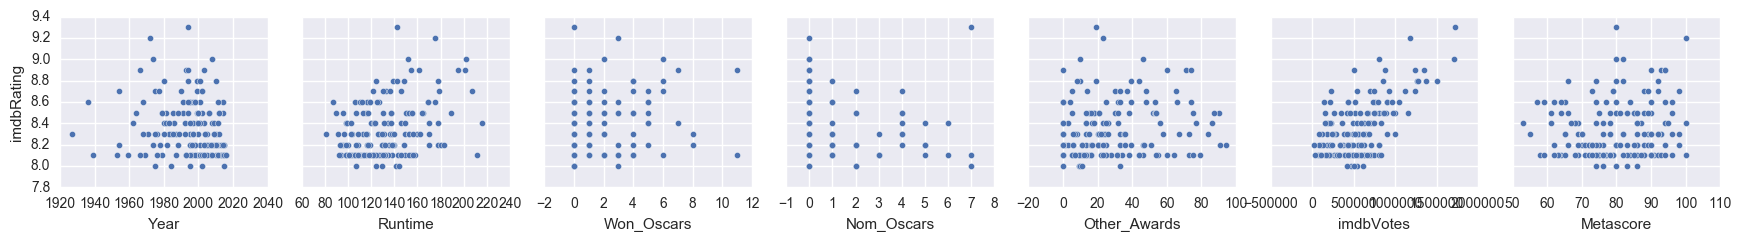

In [24]:
sns.pairplot(df,
             x_vars=['Year','Runtime','Won_Oscars','Nom_Oscars','Other_Awards','imdbVotes','Metascore'],
             y_vars='imdbRating')

Above are some simple plots each of the quantitive columns compared to the IMDB rating. It is clear that in most cases there is very little correlation. The strongest correlations can be found with runtime and number imdb votes. Suprisinly there is very little correlation between the number of awards/nomiations and the IMDB rating.

In [25]:
df.corr()

,Metascore,imdbRating,Year,Runtime,imdbVotes,Won_Oscars,Nom_Oscars,Other_Awards
Metascore,1.000000,0.134713,-0.285639,0.071002,-0.132912,0.316262,-0.099751,0.255545
imdbRating,0.134713,1.000000,-0.175721,0.355533,0.627590,0.235126,-0.057440,0.158506
Year,-0.285639,-0.175721,1.000000,-0.106440,0.209299,-0.181382,0.027723,0.381466
Runtime,0.071002,0.355533,-0.106440,1.000000,0.197098,0.353595,0.010773,0.030226
imdbVotes,-0.132912,0.627590,0.209299,0.197098,1.000000,0.173437,0.041027,0.181372
Won_Oscars,0.316262,0.235126,-0.181382,0.353595,0.173437,1.000000,-0.350348,0.285829
Nom_Oscars,-0.099751,-0.057440,0.027723,0.010773,0.041027,-0.350348,1.000000,-0.065668
Other_Awards,0.255545,0.158506,0.381466,0.030226,0.181372,0.285829,-0.065668,1.000000


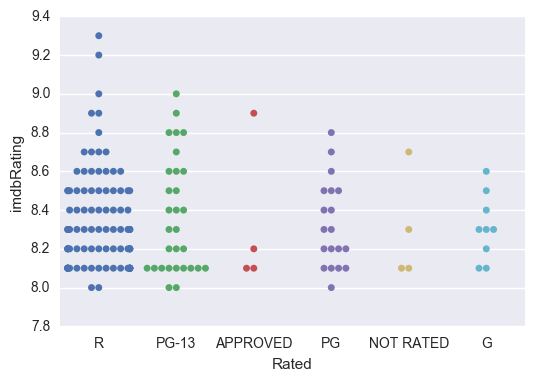

In [26]:
sns.swarmplot(x=df.Rated,y=df.imdbRating)

The category with the largest subset of movies is the R category, this is perhaps unsuprising as it encompasses all genres and artisitic expresssion.

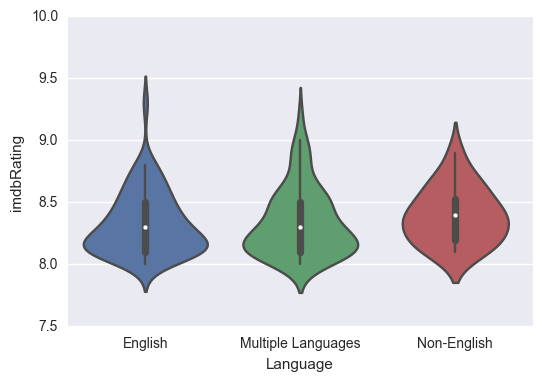

In [27]:
sns.violinplot(x=df.Language,y=df.imdbRating)

The distributions for each of the language categories are very similar, however those with multiple langauges and non-enlgish films tend to have a higher 75% quartile, but a lower max.

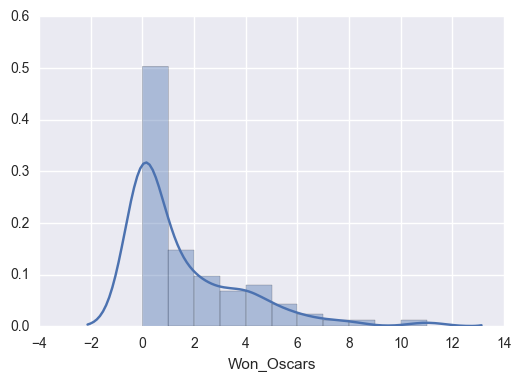

In [28]:
sns.distplot(df.Won_Oscars,bins=11,)

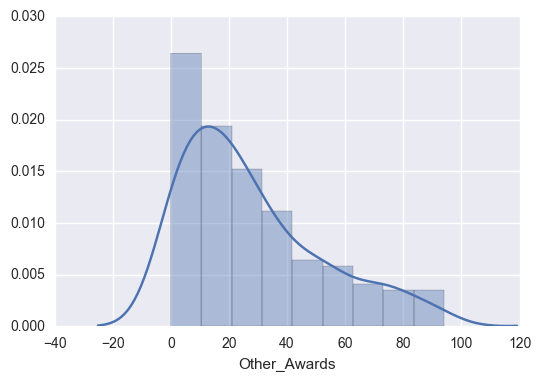

In [29]:
sns.distplot(df.Other_Awards)

Both the distributions for the number of Oscars won and the number of other awards won folow a Pareto shape, with a large amount of movies winning a single oscar or 10+ other awards. However significantly fewer movies achieved more then this. 

## Feature Processing

I will create dummy columns for all of the categorical columns that I processed earlier. I will use a count vectoriser function on the columns such as Genre and Country. For all of the numerical columns I will use a standard scaler to normalise the values. I will package up all of the feature processing in a pipeline.

In [30]:
X=df.drop('imdbRating',axis=1)
y=df.imdbRating

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
class Dummies(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    # The asterisk allows extra inputs of arbitrary number, this helps to make it more robust to different inputs
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            # do something here to return just the column(s) we want
            return pd.get_dummies(X[self.columns])
        else:
            raise TypeError("This transformer only works with Pandas Dataframes")
  
    # We don't want our column selector to do anything if a fit is called
    def fit(self, X, *_):
        return self

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
class CV(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    # The asterisk allows extra inputs of arbitrary number, this helps to make it more robust to different inputs
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            CV=CountVectorizer()
            Temp=CV.fit_transform(X[self.columns])
            data=Temp.toarray()
            df=pd.DataFrame(data=data,columns=CV.get_feature_names())
            return df
        else:
            raise TypeError("This transformer only works with Pandas Dataframes")
  
    # We don't want our column selector to do anything if a fit is called
    def fit(self, X, *_):
        return self

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
        
    # The asterisk allows extra inputs of arbitrary number, this helps to make it more robust to different inputs
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return X[self.columns]
        else:
            raise TypeError("This transformer only works with Pandas Dataframes")
  
    # We don't want our column selector to do anything if a fit is called
    def fit(self, X, *_):
        return self

In [34]:
from sklearn.pipeline import make_pipeline,make_union
from sklearn.preprocessing import StandardScaler
pipe1=make_pipeline(Dummies('Language'))
pipe2=make_pipeline(Dummies('Rated'))
pipe3=make_pipeline(CV('Genre'))
pipe4=make_pipeline(CV('Country'))
pipe5=make_pipeline(ColumnSelector(['Runtime','imdbVotes','Won_Oscars','Nom_Oscars','Other_Awards','Year','Metascore']),
                    StandardScaler())

In [121]:
## Create a list of headers to determine coefficient values later.
a=pipe1.fit_transform(df).columns
b=pipe2.fit_transform(df).columns
c=pipe3.fit_transform(df).columns
d=pipe4.fit_transform(df).columns
e=['Runtime','imdbVotes','Won_Oscars','Nom_Oscars','Other_Awards','Year','Metascore']
headers=a.append(b)
headers=headers.append(c)
headers=list(headers.append(d))
headers=headers+e

In [35]:
Union=make_union(pipe1,pipe2,pipe3,pipe4,pipe5)
X=Union.fit_transform(df)

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Modelling
Now that I have a target and feature matrix I will create a series of models and comare the results. I will use a 5 fold cross validation approach when applying a grid search. I will start with a linear regression and follow this with a Lasso and Ridge regulisation regression. I will score each of the models on the r2 value when comparing the predicted target values with the real values.

## Linear Regression

In [37]:
Model_Scores={}
Model_MSE={}

In [38]:
def plot_y(y_pred,y_real,r2):
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    sns.regplot(y_pred,y_real,ax=ax1,label='r2')
    #plt.scatter(y_pred,y_real,ax=ax1)
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Actual Values')
    ax1.set_title('Predicted vs Actual Values')
    s='$r^2$= '+str(round(r2,3))
    ax1.text(8.2,8.8,s,fontweight='bold')
    plt.show()

 Model Score: 0.83186130615
Test Score: 0.490124917022


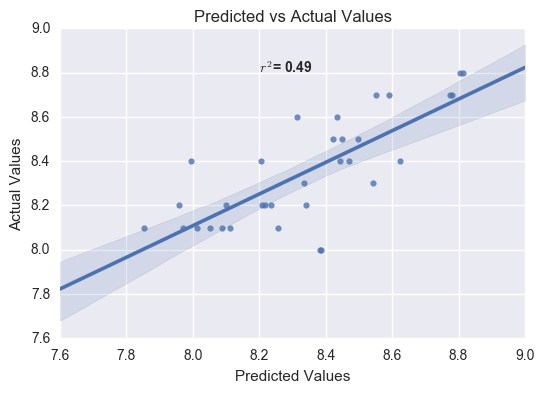

In [40]:
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error,r2_score
Lin=LinearRegression()
Lin_model=Lin.fit(X_train,y_train)
Lin_y_pred=Lin_model.predict(X_test)
print 'Model Score:',Lin_model.score(X_train,y_train)
print 'Test Score:',r2_score(y_test,Lin_y_pred)
plot_y(Lin_y_pred,y_test,r2_score(y_test,Lin_y_pred))
Model_Scores['Linear_Regression']=r2_score(y_test,Lin_y_pred)
Model_MSE['Linear_Regression']=mean_squared_error(y_test,Lin_y_pred)

## Lasso and Ridge

Model Score: 0.727907234222
Test Score: 0.594043474155


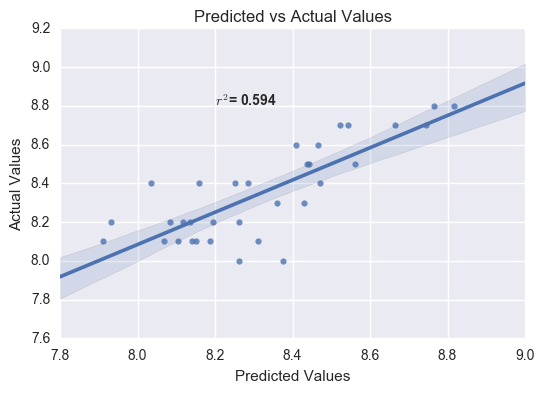

In [41]:
Las=LassoCV()
Las_model=Las.fit(X_train,y_train)
Las_y_pred=Las_model.predict(X_test)
print 'Model Score:',Las_model.score(X_train,y_train)
print 'Test Score:',r2_score(y_test,Las_y_pred)
plot_y(Las_y_pred,y_test,r2_score(y_test,Las_y_pred))
Model_Scores['Lasso']=r2_score(y_test,Las_y_pred)
Model_MSE['Lasso']=mean_squared_error(y_test,Las_y_pred)

Model Score: 0.743263931247
Test Score: 0.655918514569


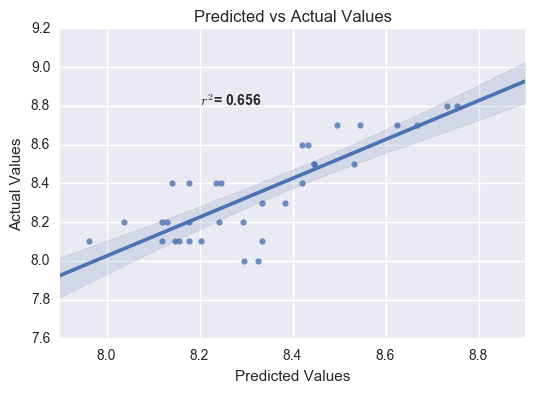

In [42]:
Rid=RidgeCV()
Rid_model=Rid.fit(X_train,y_train)
Rid_y_pred=Rid_model.predict(X_test)
print 'Model Score:',Rid_model.score(X_train,y_train)
print 'Test Score:',r2_score(y_test,Rid_y_pred)
plot_y(Rid_y_pred,y_test,r2_score(y_test,Rid_y_pred))
Model_Scores['Ridge']=r2_score(y_test,Rid_y_pred)
Model_MSE['Ridge']=mean_squared_error(y_test,Rid_y_pred)

In [127]:
Coeff_df=pd.DataFrame({'Feature':headers,'Coeff':Rid_model.coef_})
Coeff_df['Abs']=Coeff_df.Coeff.abs()
Coeff_df=Coeff_df.sort_values(by='Abs',ascending=False)
Coeff_df.head()

,Coeff,Feature,Abs
66,0.191511,imdbVotes,0.191511
26,-0.089691,thriller,0.089691
70,-0.084980,Year,0.084980
62,-0.066532,usa,0.066532
47,0.052051,italy,0.052051


The Linear Regression performed the best of the three on the training set, however due to a large amount of co-linearity between the features the perforamce on the test set was greatly reduced. Of the two reguzation methods, Ridge performed the best with a test score of 0.65. The highest coefficient by a significant margin is the the number of IMDB votes, as this had a fairly linear relationship with the IMDB score the decision tree models may not perform as well.

## Decision Trees

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}


Dtr=DecisionTreeRegressor()
gs_Dtr=GridSearchCV(Dtr,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Dtr.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 5], 'splitter': ['best', 'random'], 'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.644594936519
Test Score: 0.213067768574


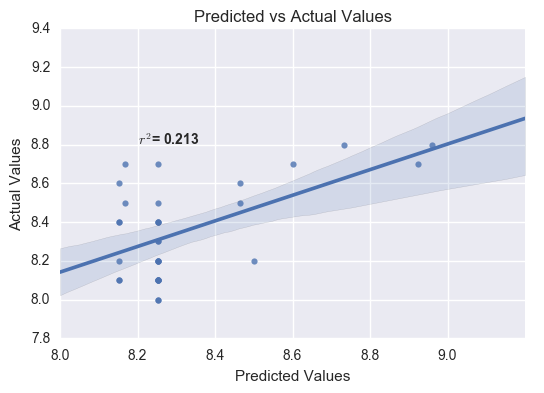

In [63]:
gs_Dtr_y_pred=gs_Dtr.predict(X_test)
r2=r2_score(y_test,gs_Dtr_y_pred)
print 'Model Score:',gs_Dtr.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Dtr_y_pred,y_test,r2)
Model_Scores['Decision_Tree']=r2_score(y_test,gs_Dtr_y_pred)
Model_MSE['Decision_Tree']=mean_squared_error(y_test,gs_Dtr_y_pred)

As expected the decison trees produced a very high model score, however when the model was applied to unseen values the score is significantly lower due to the over-fitting nature of a decison tree model. I will see how a bagging ensemble can improve on this result.

## Bagging Ensemble

Model Score: 0.922110557151
Test Score: 0.467651324086


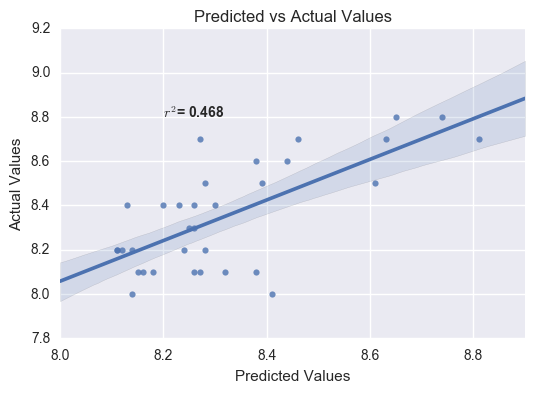

In [64]:
from sklearn.ensemble import BaggingRegressor
Bag=BaggingRegressor(Dtr)
Bag_model=Bag.fit(X_train,y_train)
Bag_y_pred=Bag_model.predict(X_test)
r2=r2_score(y_test,Bag_y_pred)
print 'Model Score:',Bag_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(Bag_y_pred,y_test,r2)

In [65]:
Bag.get_params().keys()

['base_estimator__min_samples_split',
 'n_jobs',
 'verbose',
 'base_estimator',
 'max_features',
 'base_estimator__min_samples_leaf',
 'max_samples',
 'base_estimator__max_depth',
 'base_estimator__max_features',
 'base_estimator__min_weight_fraction_leaf',
 'random_state',
 'oob_score',
 'base_estimator__splitter',
 'base_estimator__random_state',
 'base_estimator__presort',
 'base_estimator__criterion',
 'n_estimators',
 'base_estimator__max_leaf_nodes',
 'bootstrap_features',
 'warm_start',
 'bootstrap',
 'base_estimator__min_impurity_split']

In [66]:
from sklearn.model_selection import GridSearchCV
parameters={'max_samples':[0.7,1.0],
           'max_features':[0.7,1.0],
           'bootstrap_features':[True,False],
           'n_estimators':range(10,20)}

#After completion, show the final best results and scores
gs_Bag = GridSearchCV(Bag,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Bag.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [0.7, 1.0], 'max_samples': [0.7, 1.0], 'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.926659694604
Test Score: 0.522552242839


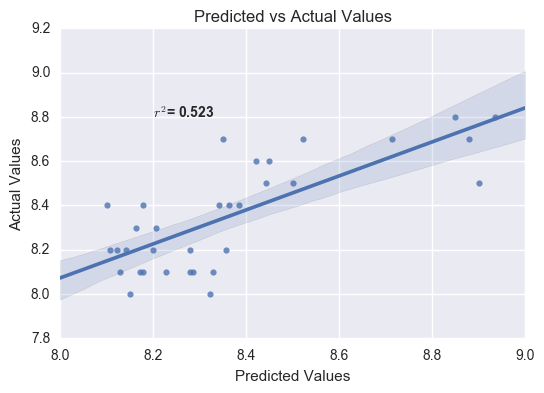

In [67]:
gs_Bag_y_pred=gs_Bag.predict(X_test)
r2=r2_score(y_test,gs_Bag_y_pred)
print 'Model Score:',gs_Bag.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Bag_y_pred,y_test,r2)
Model_Scores['Bagging']=r2_score(y_test,gs_Bag_y_pred)
Model_MSE['Bagging']=mean_squared_error(y_test,gs_Bag_y_pred)

The bagging ensemble method produces an higher model score and also boosts the score on the unseen results, however this does not produce a result as good a as the regression models.

## Random Forest

Model Score: 0.92251918728
Test Score: 0.597019230769


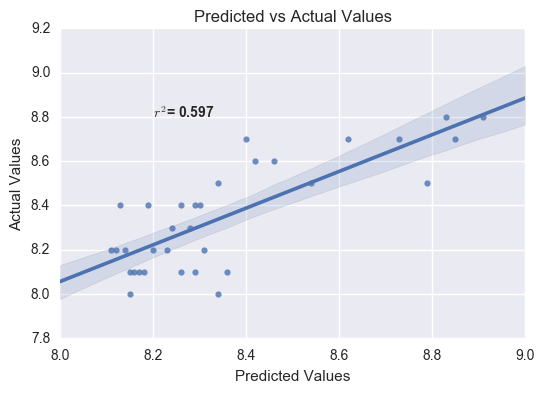

In [68]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
Rft = RandomForestRegressor()
Rft_model=Rft.fit(X_train,y_train)
Rft_y_pred=Rft_model.predict(X_test)
r2=r2_score(y_test,Rft_y_pred)
print 'Model Score:',Rft_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(Rft_y_pred,y_test,r2)

In [69]:
Rft_model.get_params

<bound method RandomForestRegressor.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>

In [70]:
parameters={'n_estimators':[3,5,10,50],
            'max_depth':range(1,10),
           'min_samples_split':[2,5],
           'max_leaf_nodes':[2,5,10]}

#After completion, show the final best results and scores
gs_Rft = GridSearchCV(Rft,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Rft.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 50], 'min_samples_split': [2, 5], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_leaf_nodes': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.807461292294
Test Score: 0.54124996624


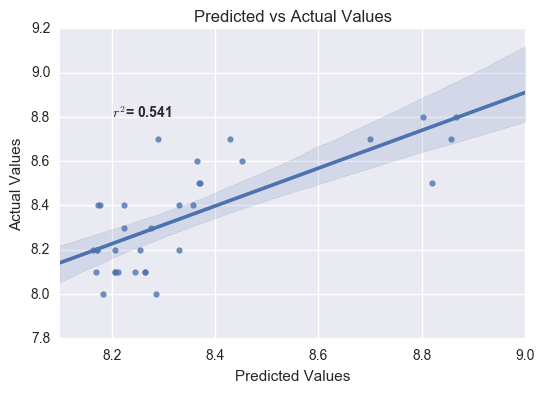

In [73]:
gs_Rft_y_pred=gs_Rft.predict(X_test)
r2=r2_score(y_test,gs_Rft_y_pred)
print 'Model Score:',gs_Rft.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Rft_y_pred,y_test,r2)
Model_Scores['Random_Forest']=r2_score(y_test,gs_Rft_y_pred)
Model_MSE['Random_Forest']=mean_squared_error(y_test,gs_Rft_y_pred)

The random forest improves upon the bagging ensemble slightly, what is suprising is that the grid search model performs worse then the stand alone.

## Extra Trees

Model Score: 1.0
Test Score: 0.461461223203


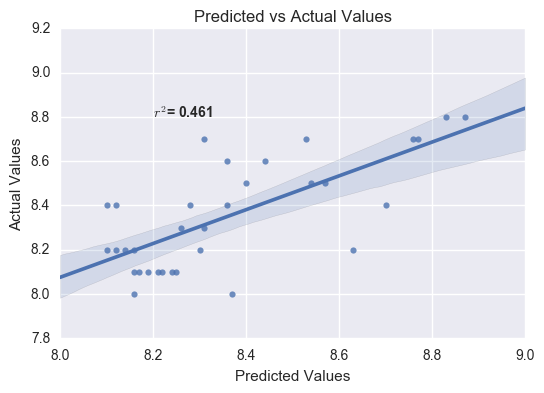

In [74]:
Ext = ExtraTreesRegressor()
Ext_model=Ext.fit(X_train,y_train)
Ext_y_pred=Ext_model.predict(X_test)
r2=r2_score(y_test,Ext_y_pred)
print 'Model Score:',Ext_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(Ext_y_pred,y_test,r2)

In [75]:
Ext.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth']

In [76]:
parameters={'n_estimators':[3,5,10,50],
            'max_depth':range(1,10),
           'min_samples_split':[2,5],
           'max_leaf_nodes':[2,5,10]}

#After completion, show the final best results and scores
gs_Ext = GridSearchCV(Ext,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Ext.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 50], 'min_samples_split': [2, 5], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_leaf_nodes': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.727671964454
Test Score: 0.559346885427


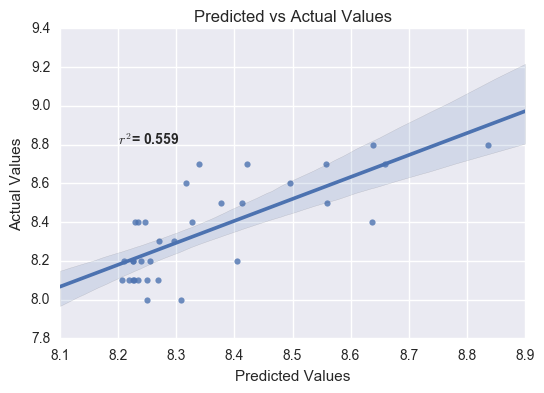

In [77]:
gs_Ext_y_pred=gs_Ext.predict(X_test)
r2=r2_score(y_test,gs_Ext_y_pred)
print 'Model Score:',gs_Ext.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Ext_y_pred,y_test,r2)
Model_Scores['Extra_Trees']=r2_score(y_test,gs_Ext_y_pred)
Model_MSE['Extra_Trees']=mean_squared_error(y_test,gs_Ext_y_pred)

Again the extra trees regressor improves upon the random forest but the perforamce is still behind the linear regression models this is likely due to a linear relationship present with some of the features.

## AdaBoost

Model Score: 0.797354981475
Test Score: 0.538830614448


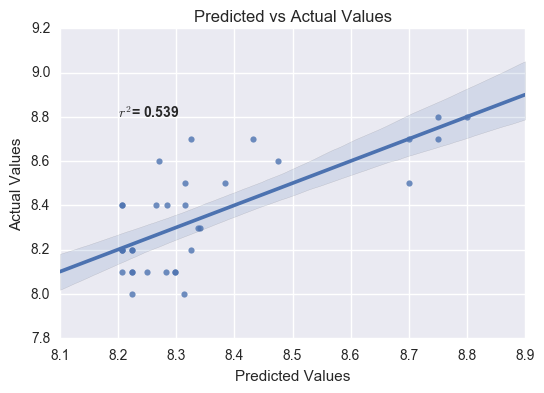

In [78]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
Ada = AdaBoostRegressor()
Ada_model=Ada.fit(X_train,y_train)
Ada_y_pred=Ada_model.predict(X_test)
r2=r2_score(y_test,Ada_y_pred)
print 'Model Score:',Ada_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(Ada_y_pred,y_test,r2)

In [79]:
Ada.get_params().keys()

['n_estimators', 'loss', 'base_estimator', 'random_state', 'learning_rate']

In [80]:
parameters={'learning_rate':range(1,10),
           'n_estimators':[3,5,10,50]}
gs_Ada = GridSearchCV(Ada,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Ada.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 5, 10, 50], 'learning_rate': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.779766991846
Test Score: 0.534111417359


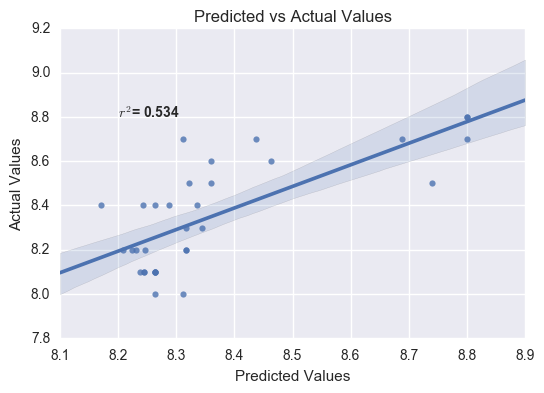

In [81]:
gs_Ada_y_pred=gs_Ada.predict(X_test)
r2=r2_score(y_test,gs_Ada_y_pred)
print 'Model Score:',gs_Ada.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Ada_y_pred,y_test,r2)
Model_Scores['AdaBoost']=r2_score(y_test,gs_Ada_y_pred)
Model_MSE['AdaBoost']=mean_squared_error(y_test,gs_Ada_y_pred)

## Gradient Boosting

Model Score: 0.972506453179
Test Score: 0.561921439085


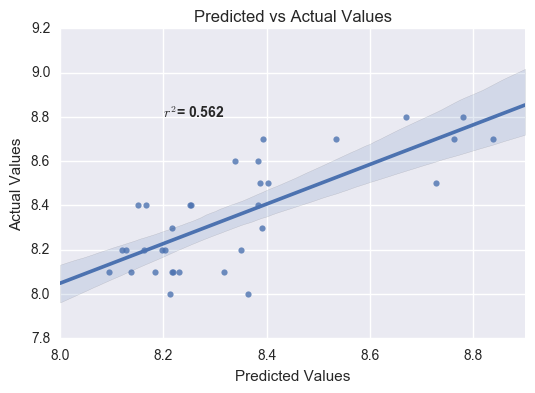

In [82]:
Gra = GradientBoostingRegressor()
Gra_model=Gra.fit(X_train,y_train)
Gra_y_pred=Gra_model.predict(X_test)
r2=r2_score(y_test,Gra_y_pred)
print 'Model Score:',Gra_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(Gra_y_pred,y_test,r2)

In [83]:
Gra.get_params().keys()

['presort',
 'loss',
 'verbose',
 'subsample',
 'max_leaf_nodes',
 'learning_rate',
 'warm_start',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'init',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'alpha',
 'max_depth']

In [86]:
parameters={'max_depth':range(1,10),
           'min_samples_split':[2,5],
           'max_leaf_nodes':[2,5,10],
           'learning_rate':range(1,10),
           'n_estimators':[3,5,10,50]}
gs_Gra = GridSearchCV(Gra,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_Gra.fit(X_train, y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=1)]: Done 9720 out of 9720 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 5], 'max_leaf_nodes': [2, 5, 10], 'learning_rate': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [3, 5, 10, 50], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.604367150157
Test Score: 0.395687266371


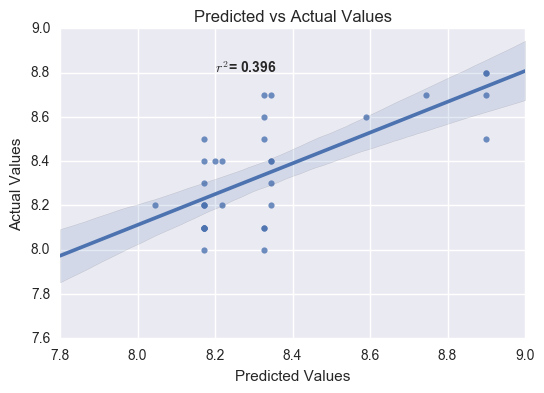

In [87]:
gs_Gra_y_pred=gs_Gra.predict(X_test)
r2=r2_score(y_test,gs_Gra_y_pred)
print 'Model Score:',gs_Gra.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_Gra_y_pred,y_test,r2)
Model_Scores['Gradient_Boost']=r2_score(y_test,gs_Gra_y_pred)
Model_MSE['Gradient_Boost']=mean_squared_error(y_test,gs_Gra_y_pred)

## Support Vector Machines

Model Score: 0.786263513296
Test Score: 0.627634595212


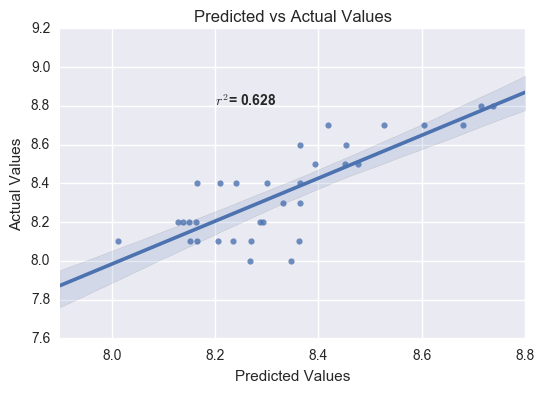

In [88]:
from sklearn.svm import SVR
svr = SVR()
svr_model=svr.fit(X_train,y_train)
svr_y_pred=svr_model.predict(X_test)
r2=r2_score(y_test,svr_y_pred)
print 'Model Score:',svr_model.score(X_train,y_train)
print 'Test Score:',r2
plot_y(svr_y_pred,y_test,r2)

In [89]:
svr.get_params().keys()

['kernel',
 'C',
 'verbose',
 'degree',
 'epsilon',
 'shrinking',
 'max_iter',
 'tol',
 'cache_size',
 'coef0',
 'gamma']

In [90]:
parameters={'C':[0.001,0.01,0.1,1.0,10,30,100],
           'gamma':['auto',0.1,1,10],
           'kernel':['linear','rbf']}
gs_svr = GridSearchCV(svr,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='r2')
gs_svr.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   45.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1.0, 10, 30, 100], 'gamma': ['auto', 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=True)

Model Score: 0.786263513296
Test Score: 0.627634595212


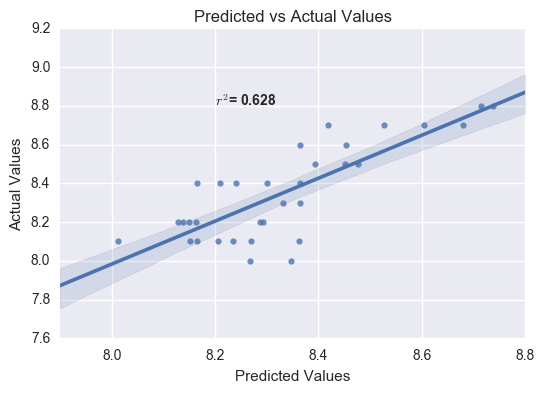

In [91]:
gs_svr_y_pred=gs_svr.predict(X_test)
r2=r2_score(y_test,gs_svr_y_pred)
print 'Model Score:',gs_svr.score(X_train,y_train)
print 'Test Score:',r2
plot_y(gs_svr_y_pred,y_test,r2)
Model_Scores['Support_Vector_Regressor']=r2_score(y_test,gs_svr_y_pred)
Model_MSE['Support_Vector_Regressor']=mean_squared_error(y_test,gs_svr_y_pred)

In [92]:
Scores_Df=pd.DataFrame(data=Model_Scores.values(),
                       index=Model_Scores.keys(),
                       columns=['Score']).sort_values(by='Score',ascending=False)
Scores_Df

,Score
Ridge,0.655919
Support_Vector_Regressor,0.627635
Lasso,0.594043
Extra_Trees,0.559347
Random_Forest,0.541250
AdaBoost,0.534111
Bagging,0.522552
Linear_Regression,0.490125
Gradient_Boost,0.395687
Decision_Tree,0.213068


In [94]:
MSE_Df=pd.DataFrame(data=Model_MSE.values(),
                       index=Model_MSE.keys(),
                       columns=['MSE']).sort_values(by='MSE')
MSE_Df

,MSE
Ridge,0.020045
Support_Vector_Regressor,0.021692
Lasso,0.023649
Extra_Trees,0.025670
Random_Forest,0.026725
AdaBoost,0.027140
Bagging,0.027814
Linear_Regression,0.029703
Gradient_Boost,0.035204
Decision_Tree,0.045843


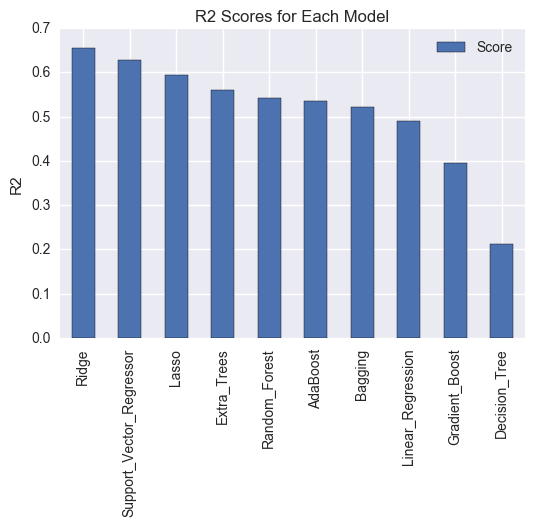

In [132]:
Scores_Df.plot(kind='bar')
plt.ylabel('R2')
plt.title('R2 Scores for Each Model')

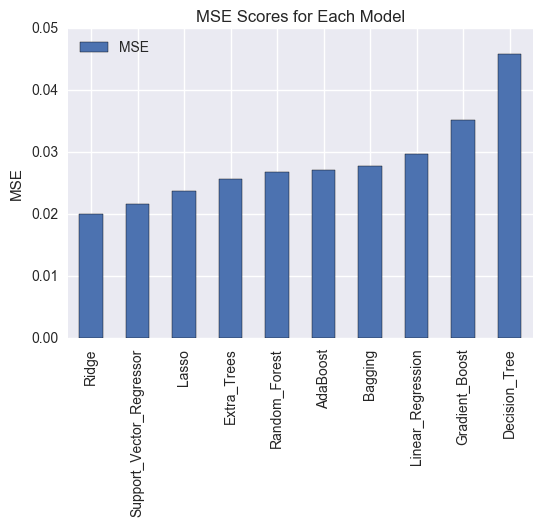

In [133]:
MSE_Df.plot(kind='bar')
plt.ylabel('MSE')
plt.title('MSE Scores for Each Model')

In [137]:
def cat_sort(x):
    if x in a:
        return 'Language'
    elif x in b:
        return 'Rated'
    elif x in c:
        return 'Genre'
    elif x in d:
        return 'Country'
    elif x in e:
        return 'Quantitive'
Coeff_df['Category']=Coeff_df.Feature.map(lambda x: cat_sort(x))
Coeff_df.head()

,Coeff,Feature,Abs,Category
66,0.191511,imdbVotes,0.191511,Quantitive
26,-0.089691,thriller,0.089691,Genre
70,-0.084980,Year,0.084980,Quantitive
62,-0.066532,usa,0.066532,Country
47,0.052051,italy,0.052051,Country


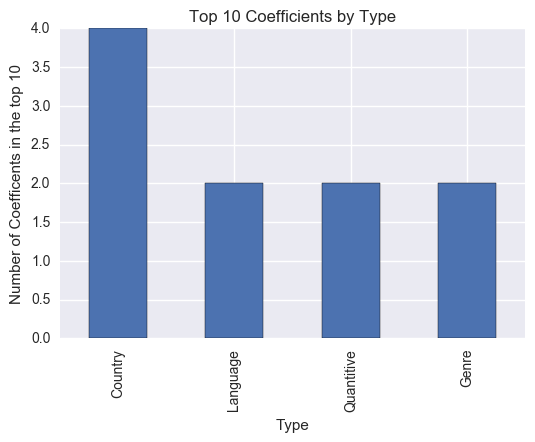

In [145]:
Coeff_df.Category.head(10).value_counts().plot(kind='bar')
plt.title('Top 10 Coefficients by Type')
plt.ylabel('Number of Coefficents in the top 10')
plt.xlabel('Type')

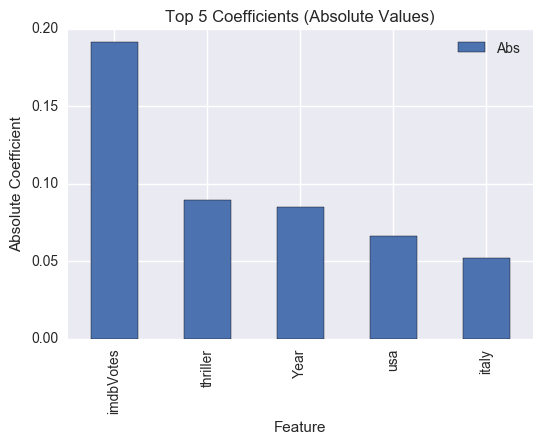

In [150]:
Coeff_df.head().plot(kind='bar',x='Feature',y='Abs')
plt.title('Top 5 Coefficients (Absolute Values)')
plt.ylabel('Absolute Coefficient')

## Executive Summary 
The Ridge Regression has performed the best of all the models that I have looked at, with an r2 of just over 0.65 and the lowest MSE. The aim of this analysis was to achieve an r2 of over 0.5 so this has been achieved. The tree based did not perform as well as they usually do in this scenario, this is perhaps due to the nature of the data, where the strongest feature (number of votes) was linearly correlated and decision tress perform quite poorly in these scenarios due to how they operate.

Although IMDB votes was the strong coefficent by a significant margin, the country of origin had the most coefficients in the top 10. Perhaps If I did not aggregate the language data I may have achieved a better score, however I believe in doing so would fit the data further to this set of movies and would leave the model less applicable to any other move.

In order to analyse this further I would scrape data from movies outside of the top 250 to see how the model performs. I would also like to include data such as budget, gross income and key cast/production team memebers.